In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import sys
sys.path.append('../')

from pathlib import Path

from pipeline.features import get_merged_df, merge_segment_dfs
from pipeline import models, validation
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
base_path = Path('/Users/zubrikhina/Documents/datasets/ЭЭГ агрессия/eeg_extracted-features/')

In [3]:
feature_methods = [
#     'coh_alpha',
#     'coh-beta',
#     'coh-theta',
#     'env-alpha',
#     'env-beta',
#     'bands',
#     'env-theta',
#     'env',
#    'coh',
    "asMap"
]


In [4]:
def plot_hist(scores, bins=None):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    accs = np.array([score.acc for score in scores])
    roc_aucs = np.array([score.roc_auc for score in scores])
    axes[0].set_title('accuracy')
    axes[1].set_title('roc-auc')
    for ax, values in zip(axes, (accs, roc_aucs)):
        _, bin_ticks, _ = ax.hist(values, bins=bins)
        ax.set_xticks(bin_ticks)
        ax.grid()
        ax.legend([f"mean={values.mean():4f}, std={values.std():4f}"], loc='lower center')


In [5]:
def calculate_cross_val_score(subject,feature_method):
    model = models.LRScaled()
    l_encoder =LabelEncoder()
    dir_60 = '60s_1_0_60'
    df_60 = get_merged_df(f"{base_path}/{subject.name}", feature_method)
    df_60['target'] =l_encoder.fit_transform(df_60['target'])
    features = list(df_60.columns.difference(['fn', 'target']))
    method = validation.NestedCrossValidator(df_60, features, model, random_state=57, p_bar=1,n_splits=5, n_repeats=1,metric='roc-auc')
    score = method.get_prediction_result()
    score.draw_confusion_matrix(method.model)
    return score

In [6]:
result_data_dict =defaultdict(list)

/Users/zubrikhina/Documents/datasets/ЭЭГ агрессия/eeg_extracted-features/SUBJECT_12


  0%|          | 0/5 [00:00<?, ?it/s]

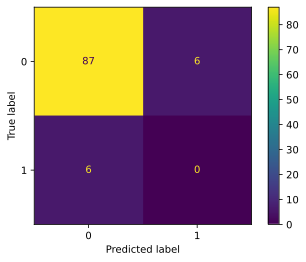

SCORE: 0.6039426523297491
_____________________________-
/Users/zubrikhina/Documents/datasets/ЭЭГ агрессия/eeg_extracted-features/SUBJECT_15


  0%|          | 0/5 [00:00<?, ?it/s]

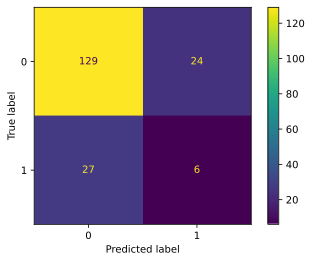

SCORE: 0.47514359279065166
_____________________________-
/Users/zubrikhina/Documents/datasets/ЭЭГ агрессия/eeg_extracted-features/SUBJECT_14


  0%|          | 0/5 [00:00<?, ?it/s]

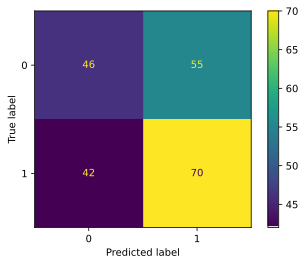

SCORE: 0.5459688826025458
_____________________________-
/Users/zubrikhina/Documents/datasets/ЭЭГ агрессия/eeg_extracted-features/SUBJECT_13


  0%|          | 0/5 [00:00<?, ?it/s]

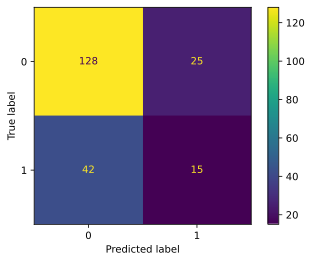

SCORE: 0.5589955280357757
_____________________________-
/Users/zubrikhina/Documents/datasets/ЭЭГ агрессия/eeg_extracted-features/SUBJECT_4


  0%|          | 0/5 [00:00<?, ?it/s]

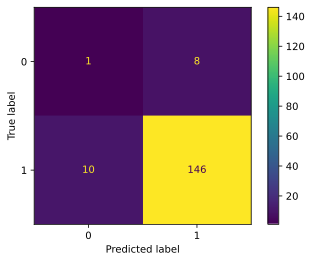

SCORE: 0.5441595441595442
_____________________________-
/Users/zubrikhina/Documents/datasets/ЭЭГ агрессия/eeg_extracted-features/SUBJECT_3


  0%|          | 0/5 [00:00<?, ?it/s]

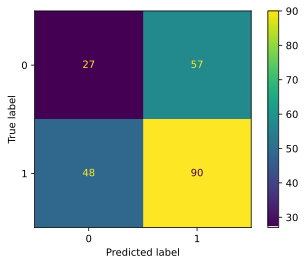

SCORE: 0.5131987577639752
_____________________________-
/Users/zubrikhina/Documents/datasets/ЭЭГ агрессия/eeg_extracted-features/SUBJECT_2


  0%|          | 0/5 [00:00<?, ?it/s]

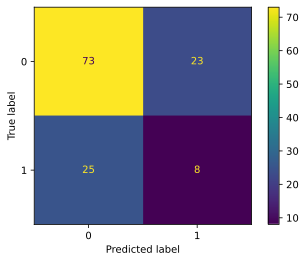

SCORE: 0.5457702020202021
_____________________________-
/Users/zubrikhina/Documents/datasets/ЭЭГ агрессия/eeg_extracted-features/SUBJECT_5


  0%|          | 0/5 [00:00<?, ?it/s]

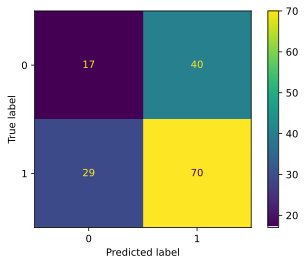

SCORE: 0.5513024986709197
_____________________________-
/Users/zubrikhina/Documents/datasets/ЭЭГ агрессия/eeg_extracted-features/SUBJECT_11


  0%|          | 0/5 [00:00<?, ?it/s]

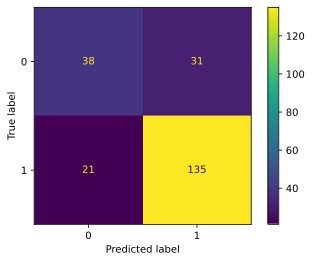

SCORE: 0.8273875882571535
_____________________________-
/Users/zubrikhina/Documents/datasets/ЭЭГ агрессия/eeg_extracted-features/SUBJECT_10


  0%|          | 0/5 [00:00<?, ?it/s]

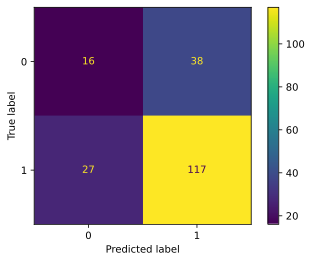

SCORE: 0.4945987654320988
_____________________________-
/Users/zubrikhina/Documents/datasets/ЭЭГ агрессия/eeg_extracted-features/SUBJECT_7


  0%|          | 0/5 [00:00<?, ?it/s]

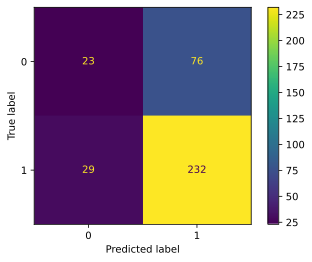

SCORE: 0.627462363094547
_____________________________-
/Users/zubrikhina/Documents/datasets/ЭЭГ агрессия/eeg_extracted-features/SUBJECT_9


  0%|          | 0/5 [00:00<?, ?it/s]

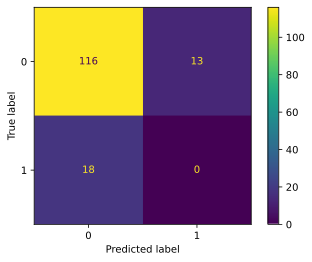

SCORE: 0.6335055986218777
_____________________________-
/Users/zubrikhina/Documents/datasets/ЭЭГ агрессия/eeg_extracted-features/SUBJECT_8


  0%|          | 0/5 [00:00<?, ?it/s]

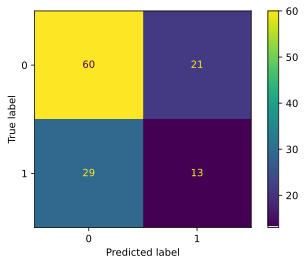

SCORE: 0.5464432686654909
_____________________________-
/Users/zubrikhina/Documents/datasets/ЭЭГ агрессия/eeg_extracted-features/SUBJECT_6


  0%|          | 0/5 [00:00<?, ?it/s]

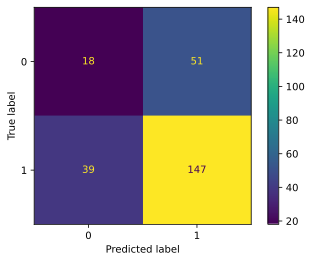

SCORE: 0.5340501792114696
_____________________________-
/Users/zubrikhina/Documents/datasets/ЭЭГ агрессия/eeg_extracted-features/SUBJECT_1


  0%|          | 0/5 [00:00<?, ?it/s]

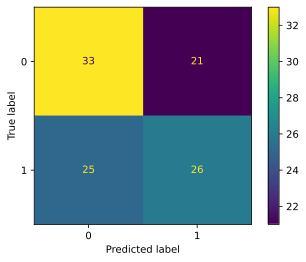

SCORE: 0.5980392156862745
_____________________________-


In [7]:
for subject in base_path.iterdir():
#    print(subject.name)
    if subject.name!='.DS_Store':
        print(subject)
        result_data_dict["subject"].append(subject.name)
#         for feature_method in feature_methods:
#             try:
#                 score = calculate_cross_val_score(subject,[feature_method])
#                 print(f"SCORE {feature_method}: ", score.roc_auc)
#                 result_data_dict[feature_method] =score.roc_auc
#             except Exception as e:
#                 print(e)
#                 result_data_dict[feature_method] =None
        score = calculate_cross_val_score(subject,feature_methods)
        result_data_dict["all_features"].append(score.roc_auc)
        print("SCORE:" , score.roc_auc)
        print("_____________________________-")
        df_res =pd.DataFrame.from_records(result_data_dict)
        df_res.to_csv('eeg-aggression.csv', index=False)

In [8]:
df_res

,all_features,subject
0,0.603943,SUBJECT_12
1,0.475144,SUBJECT_15
2,0.545969,SUBJECT_14
3,0.558996,SUBJECT_13
4,0.544160,SUBJECT_4
5,0.513199,SUBJECT_3
6,0.545770,SUBJECT_2
7,0.551302,SUBJECT_5
8,0.827388,SUBJECT_11
9,0.494599,SUBJECT_10
